#**Data Cleaning**
Master efficient workflows for cleaning real-world, messy data.

https://www.kaggle.com/learn/data-cleaning

---
**Autor:** Marcos Bezerra

**GitHub:** [https://github.com/marcos-bezerra/Data_Cleaning_Kaggle](https://github.com/marcos-bezerra/Data_Cleaning_Kaggle)

**Google Drive:** [https://drive.google.com/marcos-bezerra/Data_Cleaning_Kaggle](https://drive.google.com/drive/folders/1eHyIT60C7-QV_DaCjMFHBLAaSxbl1ikN?usp=sharing)

**Versão:** 1.0 - 13 Fev 2022

---

## **Lesson 03 - Parsing Dates**

Help Python recognize dates as composed of day, month, and year.

In [ ]:
# Autorização para acessar o google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# informa o path da Pasta Raiz da pasta de trabalho
import os
pathRaiz = '/content/drive/MyDrive/I2A2/Desafio_03_Kaggle_DataClean'
os.chdir(pathRaiz)
os.getcwd()

'/content/drive/MyDrive/I2A2/Desafio_03_Kaggle_DataClean'

In [ ]:
ls -lah dataset

total 429M
-rw------- 1 root root 432K Feb 12 12:42  catalog.csv
-rw------- 1 root root  45M Feb 13 12:33  ks-projects-201612.csv
-rw------- 1 root root  47M Feb 13 12:37  ks-projects-201612-utf8.csv
-rw------- 1 root root 263M Sep 20  2019 'NFL Play by Play 2009-2017 (v4).csv'
-rw------- 1 root root  76M Feb  9 11:51 'NFL Play by Play 2009-2017 (v4).csv.zip'
-rw------- 1 root root 231K Feb 12 12:40  pakistan_intellectual_capital.csv


# **Configure nosso ambiente**
A primeira coisa que precisamos fazer é carregar as bibliotecas e o conjunto de dados que usaremos. Estaremos trabalhando com um conjunto de dados que contém informações sobre deslizamentos de terra ocorridos entre 2007 e 2016. No exercício a seguir, você aplicará suas novas habilidades para um conjunto de dados de terremotos em todo o mundo.

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("dataset/catalog.csv")

# set seed for reproducibility
np.random.seed(42)

#Now we're ready to look at some dates!

In [ ]:
#Check the data type of our date column
#We begin by taking a look at the first five rows of the data.

landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Estaremos trabalhando com a coluna "data" do dataframe de deslizamentos de terra. Vamos nos certificar de que realmente parece que contém datas.

In [ ]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Sim, são datas! Mas só porque eu, um humano, posso dizer que são datas, não significa que Python saiba que são datas. Observe que na parte inferior da saída de head(), você pode ver que ele diz que o tipo de dados desta coluna é "objeto".

   Pandas usa o dtype "objeto" para armazenar vários tipos de tipos de dados, mas na maioria das vezes quando você vê uma coluna com o dtype "objeto", ela terá strings nela.
   Se você verificar a documentação do pandas dtype aqui, notará que também há um dtypes datetime64 específico. Como o dtype de nossa coluna é objeto em vez de datetime64, podemos dizer que o Python não sabe que essa coluna contém datas.

Também podemos ver apenas o dtype de uma coluna sem imprimir as primeiras linhas:

In [ ]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [ ]:
landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

Você pode ter que verificar a documentação numpy para combinar o código da letra com o dtype do objeto. "O" é o código para "objeto", então podemos ver que esses dois métodos nos dão a mesma informação.

**Converter nossas colunas de data para datetime**

Agora que sabemos que nossa coluna de data não está sendo reconhecida como uma data, é hora de convertê-la para que seja reconhecida como uma data. Isso é chamado de "analisar datas" porque estamos pegando uma string e identificando suas partes componentes.

Podemos determinar qual é o formato de nossas datas com um guia chamado "diretiva strftime", sobre o qual você pode encontrar mais informações neste link. A ideia básica é que você precisa apontar quais partes da data estão onde e qual pontuação está entre elas. Há muitas partes possíveis de uma data, mas as mais comuns são %d para dia, %m para mês, %y para ano de dois dígitos e %Y para ano de quatro dígitos.

Alguns exemplos:

*   17/01/07 tem o formato "%m/%d/%y"
*   17-1-2007 tem o formato "%d-%m-%Y"

Olhando para o início da coluna "data" no conjunto de dados de deslizamentos de terra, podemos ver que está no formato "mês/dia/ano de dois dígitos", então podemos usar a mesma sintaxe do primeiro exemplo para analisar nossas datas:

In [ ]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [ ]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


Now when I check the first few rows of the new column, I can see that the dtype is datetime64.
I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [ ]:
# print the first few rows
landslides['date_parsed'].head()

Agora que nossas datas foram analisadas corretamente, podemos interagir com elas de maneiras úteis.

**E se eu encontrar um erro com vários formatos de data?** Enquanto especificamos o formato de data aqui, às vezes você encontrará um erro quando houver vários formatos de data em uma única coluna. Se isso acontecer, você pode fazer com que os pandas tentem inferir qual deve ser o formato de data correto. Você pode fazer assim:

landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)

**Por que você não usa sempre infer_datetime_format = True?** Existem duas grandes razões para nem sempre ter pandas adivinhando o formato da hora. A primeira é que os pandas nem sempre conseguem descobrir o formato de data correto, especialmente se alguém for criativo com a entrada de dados. A segunda é que é muito mais lento do que especificar o formato exato das datas.

##**Select the day of the month**

Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [ ]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Se tentássemos obter as mesmas informações da coluna "data" original, obteríamos um erro: AttributeError:
Só pode usar o acessador .dt com valores semelhantes a data e hora. Isso ocorre porque dt.day não sabe como lidar com uma coluna
com o dtype "objeto". Mesmo que nosso dataframe tenha datas nele, temos que analisá-los antes de podermos interagir com
-los de forma útil.

**Plote o dia do mês para verificar a análise da data**

Um dos maiores perigos na análise de datas é misturar os meses e os dias. A função to_datetime() tem
mensagens de erro muito úteis, mas não faz mal verificar novamente se os dias do mês que extraímos fazem sentido.

Para fazer isso, vamos traçar um histograma dos dias do mês. Esperamos que tenha valores entre 1 e 31 e,
já que não há razão para supor que os deslizamentos de terra são mais comuns em alguns dias do mês do que em outros,
distribuição uniforme. (Com uma queda em 31 porque nem todos os meses têm 31 dias.) Vamos ver se é esse o caso:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


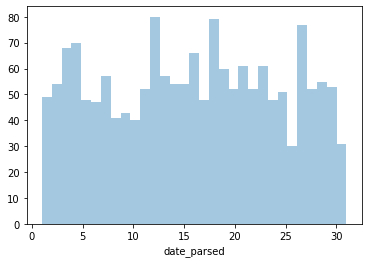

In [ ]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Sim, parece que analisamos nossas datas corretamente e esse gráfico faz muito sentido.